In [1]:
from keras.models import load_model
import numpy as np
import pandas as pd
import imageio
import glob
import matplotlib
import matplotlib.pyplot as plt
import os
import cv2
from copy import deepcopy
import json
import numpy as np
from skimage.transform import resize

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

MemoryError: Unable to allocate array with shape (779878400,) and data type float64

In [3]:
#predicted_array_unet=np.load('predicted_mask.npy')
#predicted_array_mobilenet=np.load('/home/jupyter/code/mobile_net_array/prediction_array.npy')
#ground_truth=np.load('test_real_mask.npy')
test_image=np.load('test_image.npy')
test_image_512=np.load('/home/jupyter/code/mobile_net_array/test_image_512_3_channel.npy')

In [4]:
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [6]:
# loading the model
model_mobile_net=load_model('/home/jupyter/code/mobile_net_array/Mobile_vnet_model_new.h5')

In [ ]:
import tensorflow
from tensorflow.keras.models import load_model
model_unet=load_model('model.h5')

In [18]:
test_image.shape

(500, 512, 512)

In [11]:
pred_mobile_net=[]
for image in predicted_array_mobilenet:
    image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    pred_mobile_net.append(image)
pred_mobile_net= np.array(pred_mobile_net)

In [19]:
ground_truth=ground_truth[...,np.newaxis]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


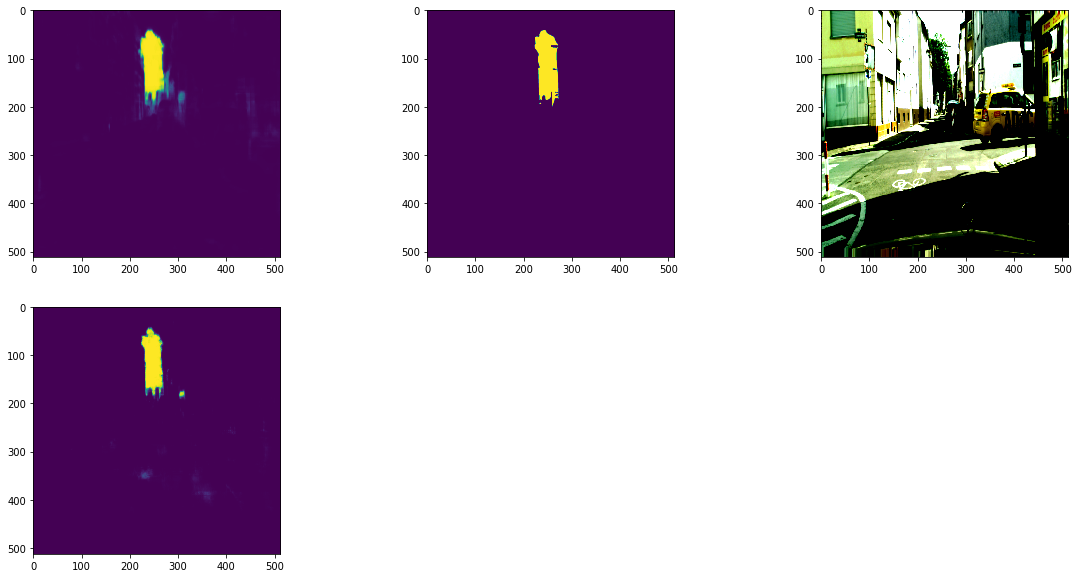

In [21]:
plt.subplot(2, 3, 1)
plt.imshow(np.squeeze(predicted_array_unet[0],axis=2))

plt.subplot(2, 3, 2)
plt.imshow(np.squeeze(ground_truth[0],axis=2))

plt.subplot(2, 3, 3)
plt.imshow(test_image_512[0])

plt.subplot(2, 3, 4)
plt.imshow(np.squeeze(pred_mobile_net[0],axis=2))

plt.show()

In [27]:
predicted_array_mobilenet[0]

array([[[9.99469817e-01, 5.07124991e-04, 2.31684935e-05],
        [9.99978662e-01, 2.12941814e-05, 5.71415271e-08],
        [9.99994993e-01, 5.03873798e-06, 4.06136955e-08],
        ...,
        [9.99999166e-01, 8.82905965e-07, 7.07512537e-09],
        [9.99999166e-01, 8.14283794e-07, 6.04197625e-09],
        [9.99980092e-01, 1.97742520e-05, 6.19246094e-08]],

       [[9.99982357e-01, 1.75146452e-05, 7.76514852e-08],
        [9.99999642e-01, 3.64567939e-07, 1.55991504e-11],
        [1.00000000e+00, 3.73305697e-09, 2.12867636e-12],
        ...,
        [1.00000000e+00, 1.28875988e-09, 4.66380786e-13],
        [1.00000000e+00, 1.79149834e-10, 4.45792437e-13],
        [1.00000000e+00, 1.55993281e-08, 6.86698040e-13]],

       [[9.99992609e-01, 7.41288477e-06, 3.32408412e-09],
        [9.99999881e-01, 7.71123609e-08, 2.02484839e-13],
        [1.00000000e+00, 1.01635544e-09, 2.37455713e-15],
        ...,
        [1.00000000e+00, 2.19179341e-10, 2.16253830e-14],
        [1.00000000e+00, 2.12

In [22]:
# setting the threshold
for image in ground_truth:
    image[image<0.5]=0
    image[image>=0.5]=1

In [23]:
for image in pred_mobile_net:
    image[image<0.5]=0
    image[image>=0.5]=1

In [24]:
for image in predicted_array_unet:
    image[image<0.5]=0
    image[image>=0.5]=1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


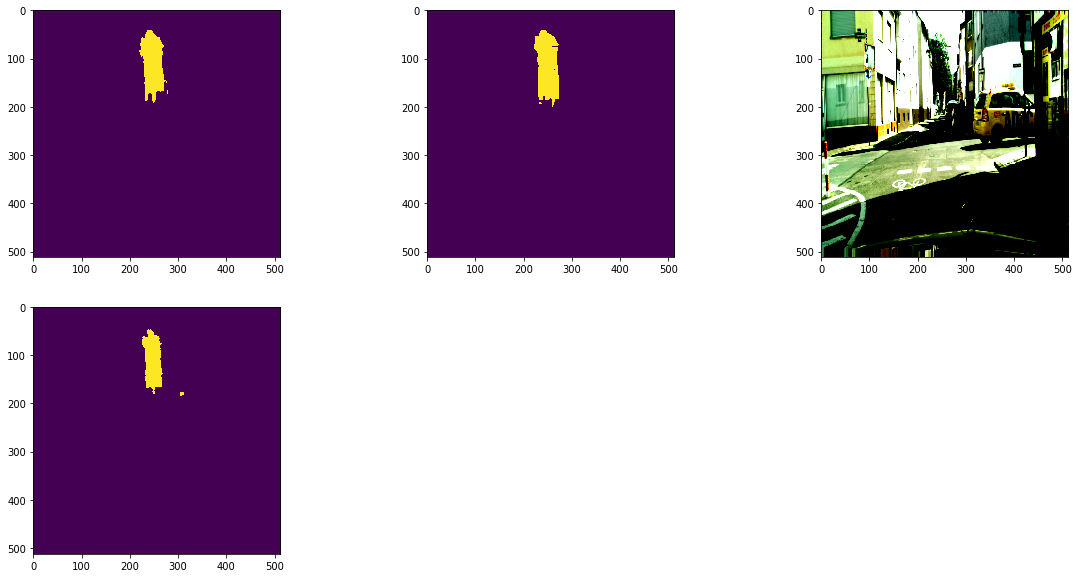

In [25]:
plt.subplot(2, 3, 1)
plt.imshow(np.squeeze(predicted_array_unet[0],axis=2))

plt.subplot(2, 3, 2)
plt.imshow(np.squeeze(ground_truth[0],axis=2))

plt.subplot(2, 3, 3)
plt.imshow(test_image_512[0])

plt.subplot(2, 3, 4)
plt.imshow(np.squeeze(pred_mobile_net[0],axis=2))

plt.show()

In [78]:
arr_iou_unet=[]
for i in range(len(ground_truth)):
    intersection = np.logical_and(ground_truth[i],predicted_array[i])
    union = np.logical_or(ground_truth[i], predicted_array[i])
    iou_score = np.sum(intersection) / np.sum(union)
    arr_iou_unet.append(iou_score)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


In [79]:
arr_iou= np.nan_to_num(arr_iou, copy=True, nan=0.0)

In [80]:
arr_iou.mean()

0.7348542093145448

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
model_1 (Model)                 multiple             1841984     input_4[0][0]                    
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, 32, 32, 512)  1476608     model_1[1][4]                    
__________________________________________________________________________________________________
concatenate_5 (Concatenate)     (None, 32, 32, 1088) 0           sequential_5[1][0]               
                                                                 model_1[1][3]              

In [85]:
import tensorflow
from tensorflow.keras.models import load_model
unet_model=load_model('model.h5')

In [88]:
unet_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 512, 512, 64) 640         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 512, 512, 64) 36928       conv2d_19[0][0]                  
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, 512, 512, 64) 256         conv2d_20[0][0]                  
____________________________________________________________________________________________

In [91]:
arr_iou.argsort()[-5:][::-1]

array([426, 325, 365, 444, 459])

In [93]:
arr_iou=[]
for i in range(len(ground_truth)):
    intersection = np.logical_and(ground_truth[i],pred_mobile_net[i])
    union = np.logical_or(ground_truth[i], pred_mobile_net[i])
    iou_score = np.sum(intersection) / np.sum(union)
    arr_iou.append(iou_score)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


In [94]:
arr_iou= np.nan_to_num(arr_iou, copy=True, nan=1.0)

In [1]:
from keras.models import load_model
import numpy as np
import pandas as pd
import imageio
import glob
import matplotlib
import matplotlib.pyplot as plt
import os
import cv2
from copy import deepcopy
import json
import numpy as np
from skimage.transform import resize

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

# performance testing

#### UNet 

In [2]:
test_image=np.load('test_image.npy')

In [6]:
import tensorflow
from tensorflow.keras.models import load_model
model_unet=load_model('model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
test_image=test_image[..., np.newaxis]
test_image.shape

(1, 512, 512, 1)

In [3]:
test_image=test_image[:1]

In [ ]:
mask_pred=[]
for image in test_image:
    image=image[np.newaxis,...]
    predicted = model_unet.predict(image, verbose=1)
    mask_pred.append(predicted)

#### mobile net v2

In [2]:
test_image_512=np.load('/home/jupyter/code/mobile_net_array/test_image_512_3_channel.npy')

In [5]:
# loading the model
model_mobile_net=load_model('/home/jupyter/code/mobile_net_array/Mobile_vnet_model_new.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [6]:
prediction=model_mobile_net.predict(test_image_512,verbose=1)

2/2 [==============================] - 6s 3s/step


In [3]:
test_image_512=test_image_512[:2]

In [4]:
test_image_512.shape

(2, 512, 512, 3)

In [9]:
prediction.shape

(1, 512, 512, 3)

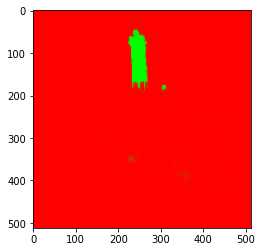

In [11]:
plt.imshow(np.squeeze(prediction[0]))

In [ ]:
tr